In [ ]:
#1

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [3]:
def likelihood(p, r, n):
    return p**r * (1-p)**(n-r)
def prior(p):
    return 1.0

def metropolis(p_initial, r, n, iterations):
    p_current = p_initial
    accepted_samples = []
    
    for _ in range(iterations):
        p_proposed = np.random.uniform(0, 1)  
        
        posterior_current = likelihood(p_current, r, n) * prior(p_current)
        posterior_proposed = likelihood(p_proposed, r, n) * prior(p_proposed)
        
     
        acceptance_ratio = posterior_proposed / posterior_current
        if acceptance_ratio >= 1 or np.random.uniform() < acceptance_ratio:
            p_current = p_proposed
            accepted_samples.append(p_current)
    
    return accepted_samples


n = 10  
r = 7  

p_initial = 0.5  
iterations = 10000  


samples = metropolis(p_initial, r, n, iterations)


p_max = max(set(samples), key=samples.count)
print("El parámetro asociado a la probabilidad de éxito p^ es:", p_max)


El parámetro asociado a la probabilidad de éxito p^ es: 0.7064345080398127


In [5]:

n = 10  
r = 7  

p_max = 0.09090909090909091


variance = p_max * (1 - p_max) / n


quantile_lower = stats.norm.ppf(0.16, loc=p_max, scale=np.sqrt(variance))
quantile_upper = stats.norm.ppf(0.84, loc=p_max, scale=np.sqrt(variance))


error_lower = p_max - quantile_lower
error_upper = quantile_upper - p_max


print("Error inferior del parámetro p:", error_lower)
print("Error superior del parámetro p:", error_upper)


Error inferior del parámetro p: 0.09040526210997755
Error superior del parámetro p: 0.09040526210997754


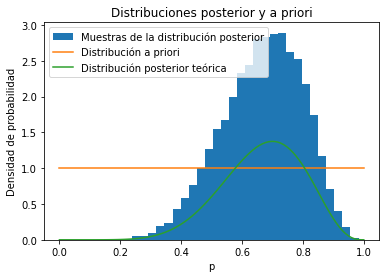

In [7]:
n = 10  
r = 7  


p = np.linspace(0, 1, 100)


prior = np.ones_like(p)


def Dist_Posterior(p, r, n):
    return p**r * (1-p)**(n-r)


n_samples = 10000
samples = np.random.beta(r+1, n-r+1, size=n_samples)


I = np.sum(Dist_Posterior(samples,r,n)) / n_samples

plt.hist(samples, bins=30, density=True, label='Muestras de la distribución posterior')


plt.plot(p, prior, label='Distribución a priori')


plt.plot(p, Dist_Posterior(p,r,n)/I, label='Distribución posterior teórica')

plt.xlabel('p')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones posterior y a priori')
plt.legend()
plt.show()

In [ ]:
#3

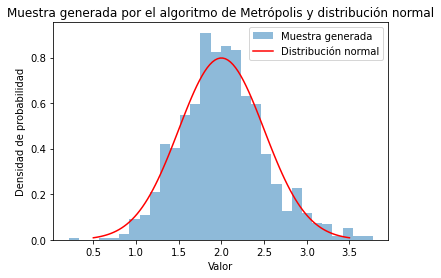

In [10]:
def metropolis_algorithm(N, mean, std_dev):
    current_sample = random.uniform(mean - std_dev, mean + std_dev)
    samples = [current_sample]

    for i in range(N - 1):

        proposal = random.gauss(current_sample, std_dev)
        

        acceptance_ratio = min(1, math.exp(-(proposal - mean)**2 / (2 * std_dev**2)) / math.exp(-(current_sample - mean)**2 / (2 * std_dev**2)))
        
    
        if random.uniform(0, 1) < acceptance_ratio:
            current_sample = proposal

        samples.append(current_sample)

    return samples


mean = 2
std_dev = 0.5


N = 1000

samples = metropolis_algorithm(N, mean, std_dev)

def normal_pdf(x, mean, std_dev):
    return 1 / (std_dev * math.sqrt(2 * math.pi)) * np.exp(-(x - mean)**2 / (2 * std_dev**2))


x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
y = normal_pdf(x, mean, std_dev)


plt.hist(samples, bins=30, density=True, alpha=0.5, label='Muestra generada')
plt.plot(x, y, color='red', label='Distribución normal')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Muestra generada por el algoritmo de Metrópolis y distribución normal')
plt.legend()
plt.show()

In [ ]:
#4

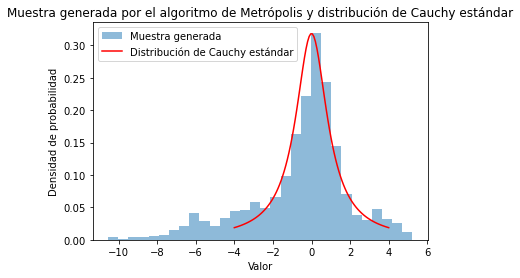

In [12]:
def metropolis_algorithm(N):
    current_sample = random.uniform(-10, 10)  
    samples = [current_sample]

    for i in range(N - 1):
 
        proposal = current_sample + random.uniform(-1, 1) 
      
        acceptance_ratio = min(1, math.pi * (1 + current_sample ** 2) / (math.pi * (1 + proposal ** 2)))

        
        if random.uniform(0, 1) < acceptance_ratio:
            current_sample = proposal

        samples.append(current_sample)

    return samples

N = 1000

samples = metropolis_algorithm(N)


def cauchy_pdf(x):
    return 1 / (math.pi * (1 + x**2))


x = np.linspace(-4, 4, 100)
y = cauchy_pdf(x)


plt.hist(samples, bins=30, density=True, alpha=0.5, label='Muestra generada')
plt.plot(x, y, color='red', label='Distribución de Cauchy estándar')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Muestra generada por el algoritmo de Metrópolis y distribución de Cauchy estándar')
plt.legend()
plt.show()